In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
from scipy.stats import zscore
import matplotlib.pyplot as plt

from sklearn.preprocessing import scale
from sklearn.preprocessing import LabelEncoder

from sklearn.model_selection import train_test_split

from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import StandardScaler

from sklearn.compose import ColumnTransformer
from sklearn.compose import make_column_selector as selector

from imblearn.pipeline import Pipeline
from imblearn.over_sampling import RandomOverSampler, SMOTE, ADASYN
from imblearn.under_sampling import RandomUnderSampler, NearMiss, CondensedNearestNeighbour

from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier

from sklearn.model_selection import cross_validate
from sklearn.model_selection import StratifiedKFold

### Data Understanding:

In [3]:
class DataUnderstanding():
    def verificando_as_dimensões_do_dataframe(self, dataframe: pd.DataFrame):
        dataframe = dataframe.shape
        print(f'Linhas: {dataframe[0]} \nColunas: {dataframe[1]}')

    def descrição(self, dataframe: pd.DataFrame):
        dataframe = dataframe.describe([.25, .50, .75, .99]).round(decimals=2)
        return dataframe

    def verificando_tipos(self, dataframe: pd.DataFrame):
        dataframe = (
            dataframe.dtypes
            .to_frame('Tipos')
        )
        return dataframe

    def verificando_valores_nulos(self, dataframe: pd.DataFrame):
        valores_nulos = dataframe.isnull().sum()
        percent_missing = (valores_nulos / len(dataframe))
        dataframe = pd.DataFrame(
            {
                'Quantidade': valores_nulos,
                'Porcentagem': percent_missing
            }
        )
        dataframe = dataframe.style.format('{:.2%}', subset=['Porcentagem'])
        return dataframe

    def verificando_valores_duplicados(self, dataframe: pd.DataFrame):
        valores_repetidos = dataframe.apply(lambda x: x.duplicated()).sum()
        percent_missing = (valores_repetidos / len(dataframe))
        dataframe = pd.DataFrame(
            {
                'Quantidade': valores_repetidos,
                'Porcentagem': percent_missing
            },
            index=dataframe.columns
        )

        dataframe = dataframe.style.format('{:.2%}', subset=['Porcentagem'])
        return dataframe

    def frequencia_da_repetição_dos_valores(self, dataframe: pd.DataFrame, coluna: str):
        dataframe = dataframe[coluna].value_counts().reset_index()
        return dataframe

    def verificando_correlação(self, dataframe: pd.DataFrame):
        dataframe = dataframe.corr()
        return dataframe


if __name__ == '__main__':
    data_understanding = DataUnderstanding()

### Data Preparetion:

In [4]:
class DataPreparetion(DataUnderstanding):
    def removendo_nulos(self, dataframe: pd.DataFrame) -> pd.DataFrame:
        return dataframe.dropna()

    def removing_outliers_zscore(self, dataframe: pd.DataFrame, column: list, threshold: int=3):
        z_scores = np.abs(zscore(dataframe[column]))
        outlier_indices = np.where(z_scores > threshold)[0]
        outlier_labels = dataframe.index[outlier_indices]
        dataframe_cleaned = dataframe.drop(outlier_labels)
        print(f'Amount of outliers: {len(outlier_indices)}')
        return dataframe_cleaned

    def removendo_colunas(self, dataframe: pd.DataFrame, colunas=[]) -> pd.DataFrame:
        return dataframe.drop(colunas, axis=1)

    def renomeando_colunas(self, dataframe: pd.DataFrame, novo_nome_e_velho_nome: dict):
        return dataframe.rename(columns=novo_nome_e_velho_nome)

    def substituindo_valores(self, dataframe: pd.DataFrame, colunas, valores) -> pd.DataFrame:
        return dataframe[colunas].replace(valores)

    def convertendo_colunas(self, dataframe: pd.DataFrame, colunas: list, tipo: str) -> pd.DataFrame:
        return dataframe[colunas].astype(tipo)

    def dummy(self, dataframe: pd.DataFrame, colunas=[]):
        dataframe = pd.get_dummies(dataframe[colunas])
        colunas = dataframe.columns
        return dataframe, colunas

    def label_endcode(self, dataframe: pd.DataFrame):
        training = LabelEncoder().fit(dataframe)
        dataframe = training.transform(dataframe)
        return dataframe

    def normalizando_os_dados(self, dataframe: pd.DataFrame):
        return scale(dataframe)


if __name__ == '__main__':
    data_preparetion = DataPreparetion()

### Data Visualization:

In [5]:
class DataVisualization(DataPreparetion):
    def __init__(self) -> None:
        sns.set_theme(
            context='talk',
            style='ticks',
            font_scale=.8,
            palette='tab10',
            rc={
                'figure.figsize': (12, 8),
                'axes.grid': True,
                'grid.alpha': .2,
                'axes.titlesize': 'x-large',
                'axes.titleweight': 'bold',
                'axes.titlepad': 20,
            }
        )

        self.scatter_kwargs = dict(palette='viridis', alpha=0.8, linewidth=0)

    def gráfico_barplot(self, dataframe: pd.DataFrame, x: str, y: str):
        sns.barplot(
            data=dataframe,
            x=x,
            y=y
        )
        plt.show()

    def gráfico_pairplot(self, dataframe: pd.DataFrame):
        sns.pairplot(dataframe)
        plt.show()

    def gráfico_heatmap(self, dataframe: pd.DataFrame):
        sns.set(style='white')
        corr = dataframe.corr()
        plt.figure(figsize=(16, 10))
        sns.heatmap(
            corr, annot=True, cmap='RdBu_r', fmt='.2f', annot_kws={'size': 12}
        )
        plt.show()

    def gráfico_boxplot(self, dataframe: pd.DataFrame, figsize: tuple):
        dataframe = dataframe.select_dtypes(include='number')
        dataframe = dataframe.apply(scale)
        fig = plt.figure(figsize=figsize)
        sns.boxplot(data=dataframe)
        plt.xticks(rotation=60, ha='right')
        plt.show()

    def gráfico_histplot(self, dataframe: pd.DataFrame, coluna: str):
        sns.histplot(data=dataframe[coluna])
        plt.xticks(rotation=60, ha='right')
        plt.show()

    def gráfico_scatterplot(self, dataframe: pd.DataFrame, x:str, y:str, hue:list, titulo: str=''):
        sns.scatterplot(data=dataframe, x=x, y=y, hue=hue)
        plt.title(titulo)
        plt.show()


if __name__ == '__main__':
    data_visualization = DataVisualization()

# Fundamentos:

## DataFrame:

In [6]:
path = r'../../../../data/german_credit_risk.csv'
df = pd.read_csv(
    filepath_or_buffer=path,
    index_col=0,
    decimal='.',
    sep=','
)

In [7]:
display(df.head())

Age     Sex  Job Housing Saving accounts Checking account  Credit amount  \
0   67    male    2     own             NaN           little           1169   
1   22  female    2     own          little         moderate           5951   
2   49    male    1     own          little              NaN           2096   
3   45    male    2    free          little           little           7882   
4   53    male    2    free          little           little           4870   

   Duration              Purpose  Risk  
0         6             radio/TV  good  
1        48             radio/TV   bad  
2        12            education  good  
3        42  furniture/equipment  good  
4        24                  car   bad

## Código:

In [8]:
class Fundamentos(DataVisualization):
    pass

if __name__ == '__main__':
    fundamentos = Fundamentos()

## Output:

### Data Understanding:

In [9]:
display(df.head(3))

Age     Sex  Job Housing Saving accounts Checking account  Credit amount  \
0   67    male    2     own             NaN           little           1169   
1   22  female    2     own          little         moderate           5951   
2   49    male    1     own          little              NaN           2096   

   Duration    Purpose  Risk  
0         6   radio/TV  good  
1        48   radio/TV   bad  
2        12  education  good

In [10]:
df.columns

Index(['Age', 'Sex', 'Job', 'Housing', 'Saving accounts', 'Checking account',
       'Credit amount', 'Duration', 'Purpose', 'Risk'],
      dtype='object')

In [11]:
fundamentos.descrição(
    dataframe=df
)

Age      Job  Credit amount  Duration
count  1000.00  1000.00        1000.00   1000.00
mean     35.55     1.90        3271.26     20.90
std      11.38     0.65        2822.74     12.06
min      19.00     0.00         250.00      4.00
25%      27.00     2.00        1365.50     12.00
50%      33.00     2.00        2319.50     18.00
75%      42.00     2.00        3972.25     24.00
99%      67.01     3.00       14180.39     60.00
max      75.00     3.00       18424.00     72.00

In [12]:
fundamentos.verificando_as_dimensões_do_dataframe(
    dataframe=df
)

Linhas: 1000 
Colunas: 10


In [13]:
fundamentos.verificando_valores_nulos(
    dataframe=df
)

In [14]:
fundamentos.verificando_valores_duplicados(
    dataframe=df
)

In [15]:
fundamentos.verificando_tipos(
    dataframe=df
)

Tipos
Age                int64
Sex               object
Job                int64
Housing           object
Saving accounts   object
Checking account  object
Credit amount      int64
Duration           int64
Purpose           object
Risk              object

### Data Visualization:

**Verificar o desbalanceamento na coluna 'Risk':**

Um conjunto de dados desbalanceado (Imbalanced Dataset) ocorre quando as classes-alvo em um conjunto de dados estão distribuídas de forma desigual, ou seja, uma classe é representada por um número significativamente menor de exemplos em comparação com outras classes. Isso é comum em problemas de classificação, onde uma classe minoritária pode ter menos exemplos em relação às classes majoritárias.

O desbalanceamento no conjunto de dados pode apresentar desafios na construção de modelos de aprendizado de máquina, pois o modelo tende a ser tendencioso em direção à classe majoritária, resultando em uma baixa capacidade de generalização para a classe minoritária. Alguns problemas que podem surgir incluem:

- **Viés de classificação:** Os modelos de aprendizado podem ser tendenciosos para a classe majoritária, resultando em um desempenho inferior na classificação correta da classe minoritária.

- **Baixa precisão:** Os modelos podem alcançar uma alta taxa de precisão global, mas isso pode ser enganoso, pois a alta precisão pode ser devido ao modelo simplesmente atribuir todas as instâncias à classe majoritária.

- **Métricas enganosas:** Métricas comuns, como acurácia, podem não ser adequadas para avaliar o desempenho do modelo em um conjunto de dados desbalanceado, pois elas podem não refletir corretamente o desempenho da classe minoritária.

- **Overfitting:** Em casos extremos de desbalanceamento, o modelo pode aprender pouco ou nada sobre a classe minoritária, levando ao overfitting nas classes majoritárias.

Para lidar com conjuntos de dados desbalanceados, existem várias abordagens que podem ser aplicadas, como:

- **Oversampling (sobreamostragem):** Aumentar artificialmente o número de exemplos da classe minoritária, por meio de técnicas como duplicação ou criação de instâncias sintéticas.

- **Undersampling (subamostragem):** Reduzir o número de exemplos da classe majoritária para equilibrar o conjunto de dados, descartando aleatoriamente instâncias dessa classe.

- **Técnicas de geração de dados sintéticos:** Gerar exemplos sintéticos da classe minoritária usando técnicas como SMOTE (Synthetic Minority Over-sampling Technique) ou ADASYN (Adaptive Synthetic Sampling).

- **Algoritmos de aprendizado específicos para desbalanceamento:** Alguns algoritmos, como Random Forests, Gradient Boosting e Support Vector Machines, têm mecanismos embutidos para lidar com o desbalanceamento.

Para se aprofundar mais no assunto de conjuntos de dados desbalanceados, você pode consultar os seguintes recursos:

- **Livros:**
    "Imbalanced Learning: Foundations, Algorithms, and Applications" de Haibo He, Yunqian Ma e Lijun Zhang.
    "Practical Guide to Handling Imbalanced Datasets" de Abhijit Dasgupta.

- **Artigos e Documentações:**
    Documentação do scikit-learn: https://scikit-learn.org/stable/modules/imbalanced-learn.html
    Artigo "Learning from Imbalanced Data" de Batista, G., Prati, R. e Monard, M.: https://doi.org/10.1145/1007730.1007735
    Artigo "A survey of resampling techniques for imbalanced data in classification tasks" de Chawla, N.V. et al.: https://doi.org/10.1016/j.acap.2003.10.011

Esses recursos fornecem uma base sólida para entender os desafios e as técnicas de lidar com conjuntos de dados desbalanceados, permitindo que você aprofunde seus conhecimentos e adote abordagens apropriadas ao lidar com esse tipo de problema.

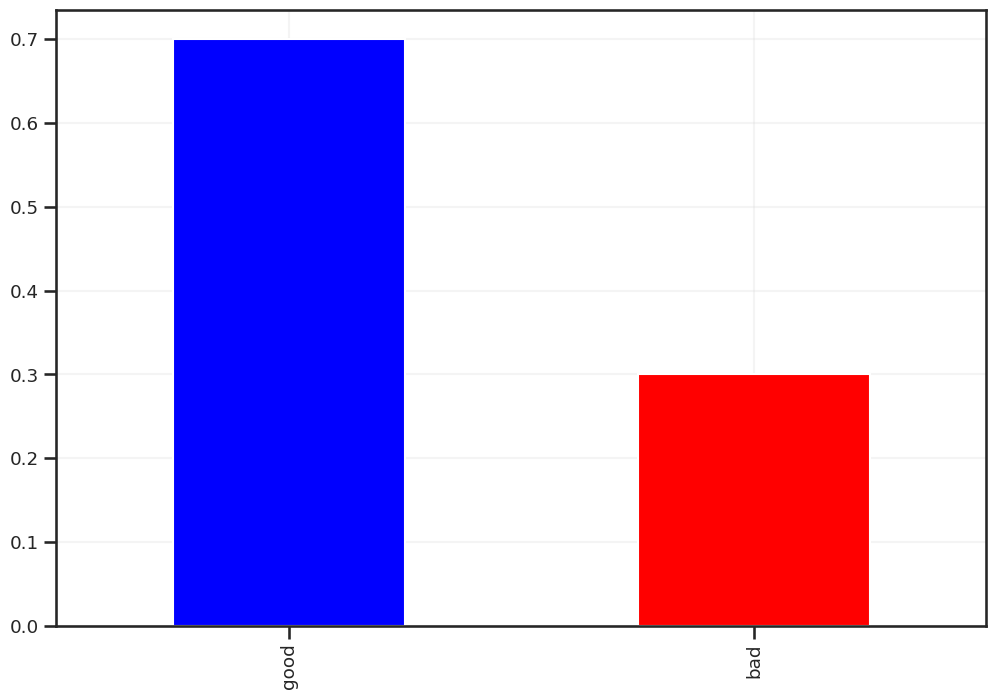

In [16]:
df['Risk'].value_counts(normalize=True).plot(kind='bar', color=['blue', 'red']);

In [17]:
df['Risk'].value_counts(normalize=True)

good    0.7
bad     0.3
Name: Risk, dtype: float64

### Data Preparetion:

**Train-test split:**

In [18]:
x = df.drop(columns=['Risk'])
y = df['Risk'].map({'good': 0, 'bad': 1})

In [19]:
X_train, X_test, y_train, y_test = train_test_split(x, y, random_state=42, stratify=y)

**Construção de pipeline de pré-processamento:**

In [20]:
# Tratar categoricos -> OneHotEncoding
# Tratar númericos -> StandardScaling

preprocessing = ColumnTransformer(
    transformers = [
        ('ohe', OneHotEncoder(drop='first', handle_unknown='ignore', sparse=False), selector(dtype_include='object')),
        ('std', StandardScaler(), selector(dtype_include='int64'))
    ]
)

### Modelagem:

**Sem balanceamento:**

**Logistic Regression:**

In [21]:
pipe_lr = Pipeline([
    ('pp', preprocessing),
    ('LR', LogisticRegression(random_state=42))
])

**KNN:**

In [22]:
pipe_knn = Pipeline([
    ('pp', preprocessing),
    ('KNN', KNeighborsClassifier())
]);

**Decision Tree:**

In [23]:
pipe_dt = Pipeline([
    ('pp', preprocessing),
    ('DT', DecisionTreeClassifier(random_state=42))
])

**Random Oversampling:**

O Random Oversampling é uma técnica de pré-processamento usada para lidar com conjuntos de dados desbalanceados. O objetivo do Random Oversampling é aumentar o número de exemplos na classe minoritária, criando cópias aleatórias desses exemplos até que a proporção entre as classes seja mais equilibrada.

Aqui estão os passos básicos do Random Oversampling:

1. **Identificar a classe minoritária:** Determine qual classe ou classes têm menos exemplos em comparação com as outras classes.

2. **Selecionar exemplos da classe minoritária:** Escolha aleatoriamente exemplos da classe minoritária para replicação.

3. **Replicação dos exemplos selecionados:** Copie os exemplos selecionados e adicione as cópias ao conjunto de dados original. Isso aumentará o número de exemplos na classe minoritária.

4. **Repetir o processo:** Repita os passos 2 e 3 até que a classe minoritária tenha um número de exemplos comparável às outras classes ou até que a proporção desejada seja alcançada.

Ao aumentar o número de exemplos da classe minoritária, o Random Oversampling visa equilibrar a distribuição das classes, fornecendo mais informações para o modelo aprender com a classe minoritária. Isso pode ajudar a evitar um viés em direção à classe majoritária e melhorar o desempenho do modelo na previsão de ambas as classes.

No entanto, é importante ter cuidado ao usar o Random Oversampling, pois ele pode levar ao superajuste (overfitting), já que cópias exatas dos exemplos existentes estão sendo adicionadas ao conjunto de dados. Para mitigar esse problema, outras técnicas, como o uso de variações e perturbações nos exemplos, podem ser aplicadas durante o processo de replicação.

Além disso, é recomendado realizar a validação cruzada (cross-validation) em conjuntos de dados com Random Oversampling para avaliar o desempenho do modelo de maneira mais robusta.

Espero que isso tenha explicado o conceito do Random Oversampling em conjuntos de dados desbalanceados. 

**Logistic Regression:**

In [24]:
pipe_ros_lr = Pipeline([
    ('pp', preprocessing),
    ('ros', RandomOverSampler(random_state=42)),
    ('LR', LogisticRegression(random_state=42))
])

**KNN:**

In [25]:
pipe_ros_knn = Pipeline([
    ('pp', preprocessing),
    ('ros', RandomOverSampler(random_state=42)),
    ('KNN', KNeighborsClassifier())
])

**Decision Tree:**

In [26]:
pipe_ros_dt = Pipeline([
    ('pp', preprocessing),
    ('ros', RandomOverSampler(random_state=42)),
    ('DT', DecisionTreeClassifier(random_state=42))
])

**SMOTE:**

O SMOTE (Synthetic Minority Over-sampling Technique) é uma técnica de amostragem sintética da classe minoritária usada para tratar conjuntos de dados desbalanceados. A principal ideia por trás do SMOTE é criar exemplos sintéticos da classe minoritária, em vez de replicar os exemplos existentes, como é feito no Random Oversampling.

A teoria por trás do SMOTE baseia-se no conceito de interpolação. Ele cria exemplos sintéticos adicionando amostras interpoladas entre pares de exemplos da classe minoritária. Isso é feito tomando dois exemplos próximos da classe minoritária e criando um novo exemplo ao longo da linha que os conecta no espaço de características. O SMOTE gera exemplos sintéticos com base na ideia de que as regiões de decisão entre as classes são mais susceptíveis de conter exemplos da classe minoritária.

Aqui estão os passos básicos do SMOTE:

1. **Selecionar um exemplo da classe minoritária:** Escolha aleatoriamente um exemplo da classe minoritária.

1. **Encontrar vizinhos mais próximos:** Encontre os k exemplos mais próximos (geralmente usando a distância euclidiana) do exemplo selecionado.

1. **Gerar exemplos sintéticos:** Para cada um dos k vizinhos mais próximos, calcule a diferença entre o exemplo selecionado e o vizinho e multiplique essa diferença por um número aleatório entre 0 e 1. Adicione o resultado a uma cópia do exemplo selecionado para criar um novo exemplo sintético.

1. **Repetir o processo:** Repita os passos 1 a 3 até que o número desejado de exemplos sintéticos tenha sido gerado.

Ao criar exemplos sintéticos, o SMOTE visa ampliar a região de decisão da classe minoritária, tornando-a mais semelhante à classe majoritária e melhorando a capacidade do modelo de generalizar corretamente.

Para aplicar o SMOTE, é necessário definir o valor de k (o número de vizinhos mais próximos a serem considerados) e a taxa de oversampling desejada. Um valor comum para k é 5, mas isso pode variar dependendo do conjunto de dados. A taxa de oversampling determina quantos exemplos sintéticos serão gerados para cada exemplo da classe minoritária.

Existem várias implementações do SMOTE disponíveis em diferentes bibliotecas de aprendizado de máquina, como o imbalanced-learn em Python. Essas implementações facilitam a aplicação do SMOTE ao conjunto de dados desbalanceado, permitindo que você treine seu modelo usando o conjunto de dados aumentado.

É importante lembrar que o SMOTE também pode levar ao superajuste se aplicado de forma indiscriminada. Portanto, é recomendado usá-lo em conjunto com outras técnicas, como validação cruzada e ajuste de hiperparâmetros, para obter um desempenho mais confiável do modelo.

**Logistic Regression:**

In [27]:
pipe_smt_lr = Pipeline([
    ('pp', preprocessing),
    ('smt', SMOTE(random_state=42)),
    ('LR', LogisticRegression(random_state=42))
])

**KNN:**

In [28]:
pipe_smt_knn = Pipeline([
    ('pp', preprocessing),
    ('smt', SMOTE(random_state=42)),
    ('KNN', KNeighborsClassifier())
])

**Decision Tree:**

In [29]:
pipe_smt_dt = Pipeline([
    ('pp', preprocessing),
    ('smt', SMOTE(random_state=42)),
    ('DT', DecisionTreeClassifier(random_state=42))
])

**ADASYN:**

O ADASYN (Adaptive Synthetic Sampling) é uma técnica de amostragem sintética desenvolvida para tratar conjuntos de dados desbalanceados. O ADASYN é uma extensão do SMOTE (Synthetic Minority Over-sampling Technique), que gera exemplos sintéticos da classe minoritária, mas com uma abordagem adaptativa que leva em consideração a dificuldade de aprendizado de cada exemplo.

A teoria por trás do ADASYN é baseada no fato de que diferentes exemplos da classe minoritária podem ter diferentes níveis de dificuldade de aprendizado para o classificador. Exemplos que são mais difíceis de aprender são ponderados mais fortemente, enquanto exemplos mais fáceis de aprender recebem menos peso na geração de exemplos sintéticos.

Aqui estão os passos básicos do ADASYN:

1. **Calcular a dificuldade de aprendizado**: Inicialmente, o ADASYN calcula a dificuldade de aprendizado de cada exemplo da classe minoritária. Isso é geralmente feito medindo a proximidade dos exemplos em relação às regiões de decisão do classificador.

2. **Calcular os pesos**: Com base nas dificuldades de aprendizado, o ADASYN calcula os pesos para cada exemplo da classe minoritária. Exemplos mais difíceis de aprender têm pesos maiores.

3. **Gerar exemplos sintéticos**: O ADASYN gera exemplos sintéticos para cada exemplo da classe minoritária, ponderando os vizinhos mais próximos de acordo com os pesos calculados. Quanto maior o peso, maior a contribuição do exemplo vizinho na geração dos exemplos sintéticos.

4. **Repetir o processo**: Repita os passos 1 a 3 até que o número desejado de exemplos sintéticos tenha sido gerado.

Ao gerar exemplos sintéticos, o ADASYN concentra-se nas regiões de difícil aprendizado, onde a classe minoritária é menos representada. Dessa forma, o ADASYN tenta equilibrar o conjunto de dados, gerando exemplos sintéticos onde eles são mais necessários.

Para aplicar o ADASYN, assim como o SMOTE, você pode usar bibliotecas de aprendizado de máquina como o imbalanced-learn em Python. Essas implementações facilitam a aplicação do ADASYN ao conjunto de dados desbalanceado e permitem que você treine seu modelo usando o conjunto de dados aumentado.

O ADASYN é mais adequado em casos em que o desequilíbrio de classes é acentuado e as classes minoritárias estão concentradas em regiões onde a fronteira de decisão é complexa. Ele pode ajudar a melhorar o desempenho de modelos de aprendizado de máquina ao lidar com problemas de classes desbalanceadas.

No entanto, assim como com outras técnicas de amostragem sintética, é importante ter cuidado com o superajuste e considerar a validação cruzada e o ajuste de hiperparâmetros para garantir resultados confiáveis.

Espero que isso tenha esclarecido o conceito do ADASYN, sua teoria e aplicação em conjuntos de dados desbalanceados. Se você tiver mais dúvidas, sinta-se à vontade para perguntar!

**Logistic Regression:**

In [30]:
pipe_asy_lr = Pipeline([
    ('pp', preprocessing),
    ('asy', ADASYN(random_state=42)),
    ('LR', LogisticRegression(random_state=42))
])

**KNN:**

In [31]:
pipe_asy_knn = Pipeline([
    ('pp', preprocessing),
    ('asy', ADASYN(random_state=42)),
    ('KNN', KNeighborsClassifier())
])

**Decision Tree:**

In [32]:
pipe_asy_dt = Pipeline([
    ('pp', preprocessing),
    ('asy', ADASYN(random_state=42)),
    ('DT', DecisionTreeClassifier(random_state=42))
])

**Random Undersampling:**

O Random Undersampling é uma técnica de pré-processamento utilizada para lidar com conjuntos de dados desbalanceados. Ao contrário do Random Oversampling, que aumenta a classe minoritária replicando exemplos, o Random Undersampling reduz a classe majoritária, eliminando aleatoriamente exemplos até que a distribuição das classes seja mais equilibrada.

**A teoria por trás do Random Undersampling é simples:** ao reduzir a classe majoritária, cria-se um conjunto de dados menor e mais balanceado, o que pode ajudar o modelo a evitar o viés em direção à classe majoritária e a ter um desempenho melhor na previsão de ambas as classes.

Aqui estão os passos básicos do Random Undersampling:

1. **Identificar a classe majoritária:** Determine qual classe ou classes têm um número significativamente maior de exemplos em comparação com as outras classes.

2. **Selecionar exemplos da classe majoritária:** Escolha aleatoriamente exemplos da classe majoritária para remoção.

3. **Remover exemplos selecionados:** Elimine os exemplos selecionados do conjunto de dados original. Isso reduzirá o número de exemplos na classe majoritária.

4. **Repetir o processo:** Repita os passos 2 e 3 até que a classe majoritária tenha um número de exemplos comparável às outras classes ou até que a proporção desejada seja alcançada.

Ao diminuir o número de exemplos da classe majoritária, o Random Undersampling visa equilibrar a distribuição das classes, fornecendo um conjunto de dados menor, mas mais representativo. Isso pode ajudar a evitar o viés em direção à classe majoritária e melhorar o desempenho do modelo na previsão de ambas as classes.

Para aplicar o Random Undersampling, você pode reduzir aleatoriamente os exemplos da classe majoritária usando bibliotecas de aprendizado de máquina, como o imbalanced-learn em Python. Essas implementações facilitam a aplicação do Random Undersampling ao conjunto de dados desbalanceado e permitem que você treine seu modelo usando o conjunto de dados reduzido.

No entanto, é importante ter cuidado ao usar o Random Undersampling, pois a remoção aleatória de exemplos pode levar à perda de informações importantes presentes na classe majoritária. Em alguns casos, isso pode resultar em uma perda de desempenho do modelo. Portanto, é recomendado avaliar os efeitos do Random Undersampling no desempenho do modelo por meio de validação cruzada e ajuste de hiperparâmetros.

O Random Undersampling pode ser útil em situações em que o desequilíbrio de classes é significativo e o conjunto de dados é muito grande para ser processado de forma eficiente. Reduzir o tamanho do conjunto de dados também pode ser útil em casos de recursos computacionais limitados.

**Logistic Regression:**

In [33]:
pipe_rus_lr = Pipeline([
    ('pp', preprocessing),
    ('rus', RandomUnderSampler(random_state=42)),
    ('LR', LogisticRegression(random_state=42))
])

**KNN:**

In [34]:
pipe_rus_knn = Pipeline([
    ('pp', preprocessing),
    ('rus', RandomUnderSampler(random_state=42)),
    ('KNN', KNeighborsClassifier())
])

**Decision Tree:**

In [35]:
pipe_rus_dt = Pipeline([
    ('pp', preprocessing),
    ('rus', RandomUnderSampler(random_state=42)),
    ('DT', DecisionTreeClassifier(random_state=42))
])

**NearMiss:**

O Near Miss Undersampling é uma técnica de pré-processamento usada para tratar conjuntos de dados desbalanceados. Ao contrário do Random Undersampling, que remove exemplos aleatoriamente da classe majoritária, o Near Miss Undersampling seleciona exemplos da classe majoritária com base em sua proximidade em relação aos exemplos da classe minoritária.

A teoria por trás do Near Miss Undersampling é baseada na ideia de que exemplos da classe majoritária que estão próximos aos exemplos da classe minoritária são mais importantes para o aprendizado do modelo. Remover seletivamente esses exemplos próximos pode ajudar a melhorar a separação entre as classes e melhorar o desempenho do modelo.

Existem diferentes variantes do Near Miss Undersampling, cada uma com uma abordagem um pouco diferente para selecionar exemplos da classe majoritária. Vou descrever dois dos métodos mais comuns:

1. **Near Miss-1:** Para cada exemplo da classe minoritária, o Near Miss-1 encontra os exemplos da classe majoritária mais próximos e os mantém no conjunto de dados. Isso significa que, para cada exemplo da classe minoritária, apenas o exemplo da classe majoritária mais próximo é mantido. O objetivo é manter apenas os exemplos da classe majoritária que são mais próximos dos exemplos da classe minoritária.

2. **Near Miss-2:** Em vez de manter apenas o exemplo mais próximo da classe majoritária, o Near Miss-2 mantém os exemplos da classe majoritária que são mais distantes dos exemplos da classe minoritária. Para cada exemplo da classe minoritária, o Near Miss-2 encontra os exemplos da classe majoritária mais distantes e os mantém no conjunto de dados. O objetivo é manter exemplos da classe majoritária que estão mais afastados dos exemplos da classe minoritária.

Aplicar o Near Miss Undersampling envolve selecionar os exemplos apropriados da classe majoritária com base na variante escolhida (Near Miss-1 ou Near Miss-2). Você pode usar bibliotecas de aprendizado de máquina, como o imbalanced-learn em Python, para aplicar o Near Miss Undersampling ao seu conjunto de dados desbalanceado.

Ao aplicar o Near Miss Undersampling, é importante considerar que, embora essa técnica ajude a melhorar a separação entre as classes e lidar com o desbalanceamento, ela também pode levar à perda de informações importantes presentes na classe majoritária. Portanto, é recomendado avaliar os efeitos do Near Miss Undersampling no desempenho do modelo usando validação cruzada e ajuste de hiperparâmetros.

O Near Miss Undersampling pode ser útil em casos em que os exemplos da classe minoritária são cruciais para o aprendizado do modelo e sua separação dos exemplos da classe majoritária é essencial para melhorar o desempenho do modelo.

NearMiss-1:

**Logistic Regression:**

In [36]:
pipe_nmi_1_lr = Pipeline([
    ('pp', preprocessing),
    ('nmi_1', NearMiss(version=1)),
    ('LR', LogisticRegression(random_state=42))
])

**KNN:**

In [37]:
pipe_nmi_1_knn = Pipeline([
    ('pp', preprocessing),
    ('nmi_1', NearMiss(version=1)),
    ('KNN', KNeighborsClassifier())
])

**Decision Tree:**

In [38]:
pipe_nmi_1_dt = Pipeline([
    ('pp', preprocessing),
    ('nmi_1', NearMiss(version=1)),
    ('DT', DecisionTreeClassifier(random_state=42))
])

NearMiss-2:

**Logistic Regression:**

In [39]:
pipe_nmi_2_lr = Pipeline([
    ('pp', preprocessing),
    ('nmi_2', NearMiss(version=2)),
    ('LR', LogisticRegression(random_state=42))
])

**KNN:**

In [40]:
pipe_nmi_2_knn = Pipeline([
    ('pp', preprocessing),
    ('nmi_2', NearMiss(version=2)),
    ('KNN', KNeighborsClassifier())
])

**Decision Tree:**

In [41]:
pipe_nmi_2_dt = Pipeline([
    ('pp', preprocessing),
    ('nmi_2', NearMiss(version=2)),
    ('DT', DecisionTreeClassifier(random_state=42))
])

NearMiss-3:

**Logistic Regression:**

In [42]:
pipe_nmi_3_lr = Pipeline([
    ('pp', preprocessing),
    ('nmi_3', NearMiss(version=3)),
    ('LR', LogisticRegression(random_state=42))
])

**KNN:**

In [43]:
pipe_nmi_3_knn = Pipeline([
    ('pp', preprocessing),
    ('nmi_3', NearMiss(version=3)),
    ('KNN', KNeighborsClassifier())
])

**Decision Tree:**

In [44]:
pipe_nmi_3_dt = Pipeline([
    ('pp', preprocessing),
    ('nmi_3', NearMiss(version=3)),
    ('DT', DecisionTreeClassifier(random_state=42))
])

**CNN:**

CNN (Convolutional Neural Network), ou Rede Neural Convolucional em português, é uma arquitetura de rede neural profunda projetada especialmente para processar dados estruturados em grade, como imagens. A teoria por trás das CNNs está enraizada na ideia de que as características locais de um dado são extremamente importantes para a tarefa de aprendizado.

As CNNs são compostas por camadas convolucionais, seguidas por camadas de pooling e, eventualmente, camadas totalmente conectadas. A camada convolucional é a parte fundamental das CNNs, sendo responsável por detectar e extrair características de baixo nível das imagens. Essas características são obtidas através de filtros (kernels) que deslizam sobre a imagem e realizam operações de convolução, aplicando uma multiplicação ponto a ponto entre o filtro e a região da imagem correspondente.

A convolução é uma operação matemática que combina a informação local de uma imagem para gerar uma representação mais compacta e informativa. O resultado da convolução é um mapa de características, que destaca a presença ou ausência de determinadas características em diferentes partes da imagem. Em seguida, a camada de pooling é aplicada para reduzir a dimensionalidade do mapa de características, preservando as informações mais relevantes.

Essa estrutura de camadas convolucionais e de pooling é aplicada em cascata, permitindo que as CNNs aprendam representações cada vez mais complexas e abstratas das imagens. Finalmente, a saída da última camada convolucional é passada para as camadas totalmente conectadas, que são responsáveis pela classificação ou regressão com base nas características aprendidas.

Para aplicar uma CNN, são necessárias as seguintes etapas:

1. **Preparação dos dados:** É necessário preparar os dados de treinamento, que normalmente são imagens, redimensionando-os para um tamanho fixo e aplicando eventuais pré-processamentos, como normalização.

2. **Definição da arquitetura da CNN:** É preciso decidir o número e a configuração das camadas convolucionais, de pooling e totalmente conectadas, além de escolher os hiperparâmetros, como o tamanho do filtro, o número de filtros, a taxa de aprendizado e a função de ativação.

3. **Treinamento da CNN:** A CNN é treinada usando os dados de treinamento, onde os pesos são ajustados iterativamente por meio de algoritmos de otimização, como o gradiente descendente, para minimizar a função de perda. Isso envolve a alimentação dos dados nas camadas convolucionais, o cálculo do erro, a retropropagação do gradiente e o ajuste dos pesos.

4. **Avaliação e inferência:** Após o treinamento, a CNN pode ser avaliada usando um conjunto de dados de validação ou teste para medir seu desempenho. Em seguida, ela pode ser usada para fazer inferências em novas imagens, fornecendo previsões de classe ou estimativas de regressão.

As CNNs têm sido amplamente utilizadas em várias aplicações de visão computacional, como reconhecimento de objetos, detecção de padrões, segmentação de imagens e muito mais. Elas têm demonstrado um excelente desempenho em tarefas relacionadas a imagens, devido à sua capacidade de aprender e extrair automaticamente características relevantes das imagens.

Existem diversas bibliotecas e frameworks, como TensorFlow e PyTorch, que fornecem implementações eficientes de CNNs e facilitam sua aplicação em problemas de aprendizado de máquina.

**Logistic Regression:**

In [45]:
pipe_cnn_lr = Pipeline([
    ('pp', preprocessing),
    ('cnn', CondensedNearestNeighbour(random_state=42)),
    ('LR', LogisticRegression(random_state=42))
])

**KNN:**

In [46]:
pipe_cnn_knn = Pipeline([
    ('pp', preprocessing),
    ('cnn', CondensedNearestNeighbour(random_state=42)),
    ('KNN', KNeighborsClassifier())
])

**Decision Tree:**

In [47]:
pipe_cnn_dt = Pipeline([
    ('pp', preprocessing),
    ('cnn', CondensedNearestNeighbour(random_state=42)),
    ('DT', DecisionTreeClassifier(random_state=42))
])

### Avaliação dos modelos:

In [48]:
skf = StratifiedKFold(
    n_splits=10, 
    shuffle=True, 
    random_state=42
)

**Sem balanceamento:**

**Logistic Regression:**

In [56]:
res = cross_validate(
    pipe_lr,
    X_train, 
    y_train, 
    scoring='f1', 
    cv=skf
)
print(f'F1 TEST: {res["test_score"].mean():.4}')

F1 TEST: 0.4356


**KNN ( $k$-Nearest Neighbors ):**

In [ ]:
res = cross_validate(
    pipe_knn,
    X_train, 
    y_train, 
    scoring='f1', 
    cv=skf
)
print(f'F1 TEST: {res["test_score"].mean():.4}')

F1 TEST: 0.3641


/home/guerrlr0/anaconda3/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)
/home/guerrlr0/anaconda3/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be ac

**Decision Tree Classifier:**

In [ ]:
res = cross_validate(
    pipe_dt,
    X_train, 
    y_train, 
    scoring='f1', 
    cv=skf
)
print(f'F1 TEST: {res["test_score"].mean():.4}')

F1 TEST: 0.4786


**Random Oversampling:**

**Logistic Regression:**

In [ ]:
res = cross_validate(pipe_ros_lr, X_train, y_train, scoring='f1', cv=skf)
print(f'F1 TEST: {res["test_score"].mean():.4}')

F1 TEST: 0.5806


**KNN:**

In [ ]:
res = cross_validate(pipe_ros_knn, X_train, y_train, scoring='f1', cv=skf)
print(f'F1 TEST: {res["test_score"].mean():.4}')

F1 TEST: 0.4783


/home/guerrlr0/anaconda3/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)
/home/guerrlr0/anaconda3/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be ac

**Decision Tree Classifier:**

In [ ]:
res = cross_validate(pipe_ros_dt, X_train, y_train, scoring='f1', cv=skf)
print(f'F1 TEST: {res["test_score"].mean():.4}')

F1 TEST: 0.424


**SMOTE:**

**Logistic Regression:**

In [ ]:
res = cross_validate(pipe_smt_lr, X_train, y_train, scoring='f1', cv=skf)
print(f'F1 TEST: {res["test_score"].mean():.4}')

F1 TEST: 0.5773


**KNN:**

In [ ]:
res = cross_validate(pipe_smt_knn, X_train, y_train, scoring='f1', cv=skf)
print(f'F1 TEST: {res["test_score"].mean():.4}')

/home/guerrlr0/anaconda3/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)
/home/guerrlr0/anaconda3/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be ac

F1 TEST: 0.4986


/home/guerrlr0/anaconda3/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)
/home/guerrlr0/anaconda3/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be ac

**Decision Tree Classifier:**

In [ ]:
res = cross_validate(pipe_smt_dt, X_train, y_train, scoring='f1', cv=skf)
print(f'F1 TEST: {res["test_score"].mean():.4}')

F1 TEST: 0.4456


**ADASYN:**

**Logistic Regression:**

In [ ]:
res = cross_validate(pipe_asy_lr, X_train, y_train, scoring='f1', cv=skf)
print(f'F1 TEST: {res["test_score"].mean():.4}')

F1 TEST: 0.5675


**KNN:**

In [ ]:
res = cross_validate(pipe_asy_knn, X_train, y_train, scoring='f1', cv=skf)
print(f'F1 TEST: {res["test_score"].mean():.4}')

/home/guerrlr0/anaconda3/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)
/home/guerrlr0/anaconda3/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be ac

F1 TEST: 0.4903


/home/guerrlr0/anaconda3/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)
/home/guerrlr0/anaconda3/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be ac

**Decision Tree Classifier:**

In [ ]:
res = cross_validate(pipe_asy_dt, X_train, y_train, scoring='f1', cv=skf)
print(f'F1 TEST: {res["test_score"].mean():.4}')

F1 TEST: 0.4372


**Random Undersampling:**

**Logistic Regression:**

In [ ]:
res = cross_validate(pipe_rus_lr, X_train, y_train, scoring='f1', cv=skf)
print(f'F1 TEST: {res["test_score"].mean():.4}')

F1 TEST: 0.565


**KNN:**

In [ ]:
res = cross_validate(pipe_rus_knn, X_train, y_train, scoring='f1', cv=skf)
print(f'F1 TEST: {res["test_score"].mean():.4}')

F1 TEST: 0.4845


/home/guerrlr0/anaconda3/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)
/home/guerrlr0/anaconda3/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be ac

**Decision Tree Classifier:**

In [ ]:
res = cross_validate(pipe_rus_dt, X_train, y_train, scoring='f1', cv=skf)
print(f'F1 TEST: {res["test_score"].mean():.4}')

F1 TEST: 0.4856


**NearMiss:**

NearMiss-1:

**Logistic Regression:**

In [ ]:
res = cross_validate(pipe_nmi_1_lr, X_train, y_train, scoring='f1', cv=skf)
print(f'F1 TEST: {res["test_score"].mean():.4}')

F1 TEST: 0.5215


**KNN:**

In [ ]:
res = cross_validate(pipe_nmi_1_knn, X_train, y_train, scoring='f1', cv=skf)
print(f'F1 TEST: {res["test_score"].mean():.4}')

/home/guerrlr0/anaconda3/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)
/home/guerrlr0/anaconda3/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be ac

F1 TEST: 0.459


/home/guerrlr0/anaconda3/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


**Decision Tree Classifier:**

In [ ]:
res = cross_validate(pipe_nmi_1_dt, X_train, y_train, scoring='f1', cv=skf)
print(f'F1 TEST: {res["test_score"].mean():.4}')

F1 TEST: 0.4917


NearMiss-2:

**Logistic Regression:**

In [ ]:
res = cross_validate(pipe_nmi_2_lr, X_train, y_train, scoring='f1', cv=skf)
print(f'F1 TEST: {res["test_score"].mean():.4}')

F1 TEST: 0.5348


**KNN:**

In [ ]:
res = cross_validate(pipe_nmi_2_knn, X_train, y_train, scoring='f1', cv=skf)
print(f'F1 TEST: {res["test_score"].mean():.4}')

/home/guerrlr0/anaconda3/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)
/home/guerrlr0/anaconda3/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be ac

F1 TEST: 0.4488


/home/guerrlr0/anaconda3/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)
/home/guerrlr0/anaconda3/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be ac

**Decision Tree Classifier:**

In [ ]:
res = cross_validate(pipe_nmi_2_dt, X_train, y_train, scoring='f1', cv=skf)
print(f'F1 TEST: {res["test_score"].mean():.4}')

F1 TEST: 0.4375


NearMiss-3:

**Logistic Regression:**

In [ ]:
res = cross_validate(pipe_nmi_3_lr, X_train, y_train, scoring='f1', cv=skf)
print(f'F1 TEST: {res["test_score"].mean():.4}')

F1 TEST: 0.5644


**KNN:**

In [ ]:
res = cross_validate(pipe_nmi_3_knn, X_train, y_train, scoring='f1', cv=skf)
print(f'F1 TEST: {res["test_score"].mean():.4}')

/home/guerrlr0/anaconda3/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)
/home/guerrlr0/anaconda3/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be ac

F1 TEST: 0.4515


/home/guerrlr0/anaconda3/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)
/home/guerrlr0/anaconda3/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be ac

**Decision Tree Classifier:**

In [ ]:
res = cross_validate(pipe_nmi_3_dt, X_train, y_train, scoring='f1', cv=skf)
print(f'F1 TEST: {res["test_score"].mean():.4}')

F1 TEST: 0.4275


**CNN:**

**Logistic Regression:**

In [ ]:
res = cross_validate(pipe_cnn_lr, X_train, y_train, scoring='f1', cv=skf)
print(f'F1 TEST: {res["test_score"].mean():.4}')

/home/guerrlr0/anaconda3/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)
/home/guerrlr0/anaconda3/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be ac

F1 TEST: 0.5769


/home/guerrlr0/anaconda3/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)
/home/guerrlr0/anaconda3/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be ac

**KNN:**

In [ ]:
res = cross_validate(pipe_cnn_knn, X_train, y_train, scoring='f1', cv=skf)
print(f'F1 TEST: {res["test_score"].mean():.4}')

/home/guerrlr0/anaconda3/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)
/home/guerrlr0/anaconda3/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be ac

F1 TEST: 0.4822


**Decision Tree Classifier:**

In [ ]:
res = cross_validate(pipe_cnn_dt, X_train, y_train, scoring='f1', cv=skf)
print(f'F1 TEST: {res["test_score"].mean():.4}')

/home/guerrlr0/anaconda3/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)
/home/guerrlr0/anaconda3/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be ac

F1 TEST: 0.4432


/home/guerrlr0/anaconda3/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)
/home/guerrlr0/anaconda3/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be ac